In this notebook we carry out hypthesis tests on collected data.

For the category-related frequencies, i.e., query lengths, word lengths etc. we use the [*G-test*](https://en.wikipedia.org/wiki/G-test) to investigate if the distributions of the AQL are similar to the distributions of the other query logs. The G-test is a likelihood-ratio and its values are chi-squared distributed. Let $O_i$ be an observed frequency of an event $i$ and let $E_i$ be the expected frequency of that event. Then the G-test is formulated as:
$$ G = 2\sum_i O_i \cdot \mathrm{ln}\left(\frac{O_i}{E_i}\right)$$
The nullhypothesis $H_0$ states that the two distributions $\mathbf{O}$ and $\mathbf{E}$ are equal.
It is rejected if we get a p-value $p$ smaller than some threshold $\alpha$ which depends on the degree of freedom of our statistic. Therefore we are looking for a high p-value since we would like to see similar distributions.  

First, lets test the cases *Characters per Query* and *Characters per Named Entity*.

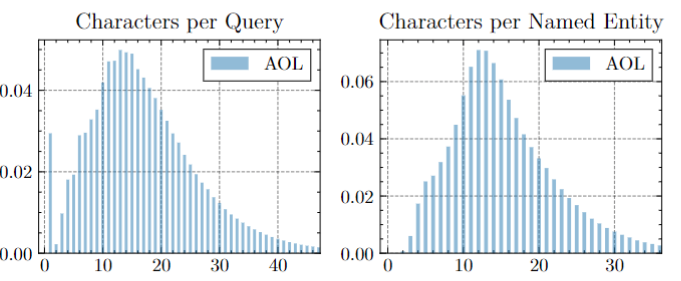

In [15]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# save visualization or not
# save_vis: bool = False
save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

# plot cleaned aol data or not
cleaned_aol = False
# cleaned_aol = True

struc_level = []
struc_level.append('queries')
struc_level.append('named-entities')
# struc_level.append('words')

base_analyses = []
# base_analyses.append('character-count-frequencies') #-{struc}
base_analyses.append('word-count-frequencies')
# base_analyses.append('entity-count-frequencies')

analyses = []
for item in base_analyses:
    for struc in struc_level:
        analyses.append(f'{item}-{struc}')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False


In [2]:
analyses.append('character-count-frequencies-words') #-{struc}
analyses.append('entity-count-frequencies-queries') #-{struc}

In [16]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pathlib import Path
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary
        paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
            "aol", "aql", "ms-marco", "orcas"]}
        if analysis_name == 'character-count-frequencies-words' and cleaned_aol:
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-words-character-count-frequencies-special")
            paths["aol"] = [path for path in base_path.iterdir(
        )]
        if analysis_name == 'character-count-frequencies-queries':
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-get-char-count-special")
            paths["aql"] = [path for path in base_path.iterdir(
        )]
            
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths, test_data=test_data)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")

        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name)
        if analysis_name == 'character-count-frequencies-words' and cleaned_aol:
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-words-character-count-frequencies-special")
            result_paths = [path for path in base_path.iterdir(
        )]
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

Loading data from aol dataset
aol loaded in 0.03613960345586141 min
Loading data from aql dataset
aql loaded in 0.050522371133168535 min
Loading data from ms-marco dataset
ms-marco loaded in 0.04471368789672851 min
Loading data from orcas dataset
orcas loaded in 0.03819701671600342 min
Loading data from aol dataset
aol loaded in 0.018645608425140382 min
Loading data from aql dataset
aql loaded in 0.03719905217488607 min
Loading data from ms-marco dataset
ms-marco loaded in 0.01766680876413981 min
Loading data from orcas dataset
orcas loaded in 0.018501623471577962 min


In [17]:
from thesis_schneg.vis_modules import g_test
from numpy import array as np_array

cnt = 0
for analysis in analysis_data:
    print(analyses[cnt])
    test_data = analysis['aql']
    if 'character-count' in test_data.columns:
        test_data = test_data.query('`character-count` > 0')
        test_data = test_data.query('`character-count` < 50').sort_values('character-count', ascending=True)
        test_data = test_data['count()'].to_numpy()
        col = 'character-count'
        max = 50
    elif 'entity-count' in test_data.columns:
        test_data = test_data.query('`entity-count` > 0')
        test_data = test_data.query('`entity-count` < 5').sort_values('entity-count', ascending=True)
        test_data = test_data['count()'].to_numpy()
        col = 'entity-count'
        max = 5
    elif 'word-count' in test_data.columns:
        test_data = test_data.query('`word-count` > 0')
        test_data = test_data.query('`word-count` < 8').sort_values('word-count', ascending=True)
        test_data = test_data['count()'].to_numpy()  
        col = 'word-count'
        max = 8
    for dataset, data in analysis.items():
        if dataset != 'aql':
            exp_data = data.query(f"`{col}` > 0")
            exp_data = exp_data.query(f'`{col}` < {max}').sort_values(col, ascending=True)
            exp_data = exp_data['count()'].to_numpy()
            print(f"Test AQL vs {dataset.upper()}: {g_test(test_data, exp_data, normal=True)}")
            # print(f"Test data: {normalize(test_data)}\nExpected data: {normalize(exp_data)}")
    cnt+=1

word-count-frequencies-queries
Test AQL vs AOL: 0.1973133992339425
Test AQL vs MS-MARCO: 0.6399018635722585
Test AQL vs ORCAS: 1.3990080087787187
word-count-frequencies-named-entities
Test AQL vs AOL: 0.08259643937293498
Test AQL vs MS-MARCO: 0.058963557836543355
Test AQL vs ORCAS: 0.21728984678147728
